In [1]:
import load_data as ld
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import sklearn.feature_extraction.text
import sklearn.multiclass
import sklearn.linear_model
% matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8

In [2]:
df = ld.load_data()

C:\Users\kevin.rose\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
crime_df = df.ix[df['relevant'], :]
print(crime_df.shape)
crime_df = crime_df.ix[crime_df.loc[:, 'OEMC':'TASR'].any(1), :]
print(crime_df.shape)

idx = np.random.permutation(crime_df.shape[0])
trn = crime_df.iloc[idx[:int(crime_df.shape[0] * 0.7)], :]
tst = crime_df.iloc[idx[int(crime_df.shape[0] * 0.7):], :]
print(trn.shape)
print(tst.shape)

(112091, 45)
(34253, 45)
(23977, 45)
(10276, 45)


In [4]:
# vectorize data
vectorizer = sklearn.feature_extraction.text.CountVectorizer()
X = vectorizer.fit_transform(trn['bodytext'].values)

Y = trn.loc[:, 'OEMC':'TASR'].values

In [5]:
X.shape

(23977, 119007)

In [6]:
clf = sklearn.multiclass.OneVsRestClassifier(
    sklearn.linear_model.LogisticRegression()
)
clf.fit(X, Y)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [7]:
X_tst = vectorizer.transform(tst['bodytext'].values)
Y_tst = tst.loc[:, 'OEMC':'TASR'].values

Y_hat = clf.predict_proba(X_tst)

In [8]:
perf = pd.DataFrame()

for i in range(Y_hat.shape[1]):
    tag = tst.columns[7+i]
    perf.loc['TP', tag] = sum((Y_hat[:,i] > .5) & (Y_tst[:,i] == 1))
    perf.loc['FP', tag] = sum((Y_hat[:,i] > .5) & (Y_tst[:,i] == 0))
    perf.loc['TN', tag] = sum((Y_hat[:,i] < .5) & (Y_tst[:,i] == 0))
    perf.loc['FN', tag] = sum((Y_hat[:,i] < .5) & (Y_tst[:,i] == 1))
    perf.loc['TPR', tag] = perf.loc['TP', tag] / (perf.loc['TP', tag] + perf.loc['FN', tag])
    perf.loc['FPR', tag] = perf.loc['FP', tag] / (perf.loc['FP', tag] + perf.loc['TN', tag])
    perf.loc['PPV', tag] = perf.loc['TP', tag] / (perf.loc['TP', tag] + perf.loc['FP', tag])

perf = perf.T
perf

,TP,FP,TN,FN,TPR,FPR,PPV
OEMC,11.0,7.0,10228.0,30.0,0.268293,0.000684,0.611111
CPD,4531.0,1066.0,3872.0,807.0,0.848820,0.215877,0.809541
SAO,618.0,263.0,9020.0,375.0,0.622356,0.028331,0.701476
CCCC,330.0,221.0,9329.0,396.0,0.454545,0.023141,0.598911
CCJ,124.0,64.0,9973.0,115.0,0.518828,0.006376,0.659574
CCSP,235.0,74.0,9794.0,173.0,0.575980,0.007499,0.760518
CPUB,20.0,11.0,10205.0,40.0,0.333333,0.001077,0.645161
IDOC,43.0,24.0,10164.0,45.0,0.488636,0.002356,0.641791
DOMV,326.0,88.0,9665.0,197.0,0.623327,0.009023,0.787440
SEXA,620.0,74.0,9451.0,131.0,0.825566,0.007769,0.893372


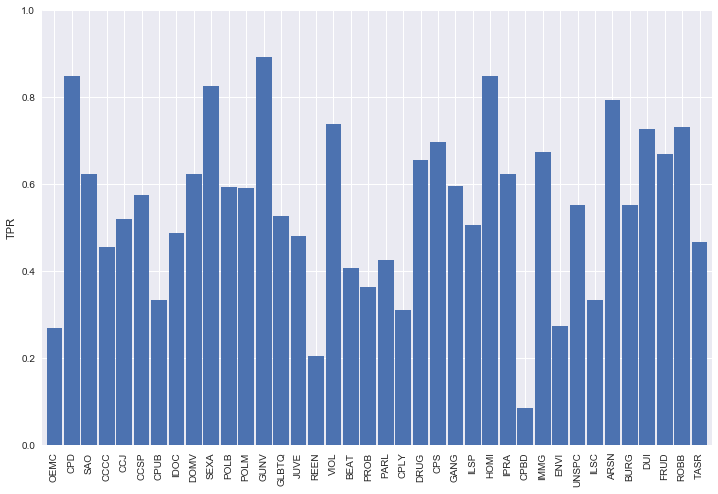

In [9]:
perf['TPR'].plot(kind='bar', ylim=[0,1], width=0.9)
plt.ylabel('TPR');

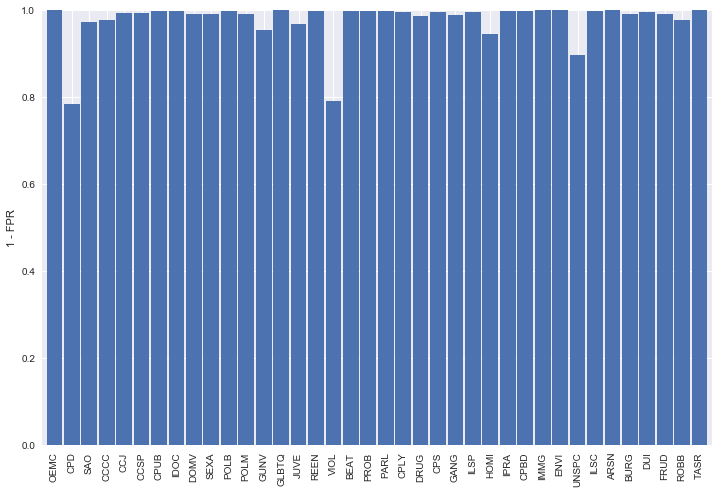

In [10]:
(1 - perf['FPR']).plot(kind='bar', ylim=[0,1], width=0.9)
plt.ylabel('1 - FPR');

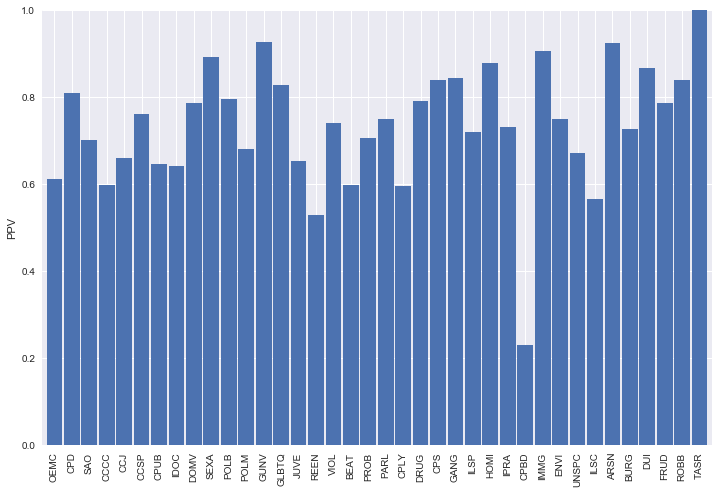

In [11]:
perf['PPV'].plot(kind='bar', ylim=[0,1], width=0.9)
plt.ylabel('PPV');

In [12]:
import benchmark_tagging as bt

In [13]:
print(bt.benchmark(
    lambda: sklearn.multiclass.OneVsRestClassifier(
        sklearn.linear_model.LogisticRegression()
    ),
    vectorizer.transform(crime_df['bodytext'].values),
    crime_df.loc[:, 'OEMC':'TASR'].values
))

[0.96313515573145847, 0.96366558694997451, 0.96242401519388798, 0.96333060843162444]


In [14]:
from importlib import reload
reload(bt)

<module 'benchmark_tagging' from 'C:\\Users\\kevin.rose\\Documents\\GitHub\\cjp-article-tagging\\src\\benchmark_tagging.py'>

In [15]:
np.mean([0.96313515573145847, 0.96366558694997451, 0.96242401519388798, 0.96333060843162444])

0.96313884157673635